In [1]:
import pandas as pd
import numpy as np

In [2]:
td = pd.read_csv(r"C:\Users\Sai\Desktop\pyhton csv files\Trip_advisor_review.csv")


In [3]:
td.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:


td= td.rename(columns={'Rating':'Y', 'Review':'X'})

In [5]:
td.Y.value_counts()

Y
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [6]:
# 1 -ve ,2 neutral and 3 +ve
td=td.replace({2:1,3:2,4:2,5:2})

In [7]:
td.X=td.X.str.lower()

In [8]:
import nltk 
from nltk.corpus import stopwords

In [9]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
len(stopwords.words('english'))

179

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
l1=string.punctuation
l2= stopwords.words('english')

In [13]:
def text_process(mess):


    nopunc = [char for char in mess if char not in l1]
    nopunc ="".join(nopunc)

    return [word for word in nopunc.split() if word not in l2]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(td["X"])

In [16]:
bow_transformer.vocabulary_

{'nice': 49206,
 'hotel': 36909,
 'expensive': 28378,
 'parking': 53208,
 'got': 33582,
 'good': 33347,
 'deal': 21915,
 'stay': 68556,
 'anniversary': 6999,
 'arrived': 8200,
 'late': 42141,
 'evening': 27588,
 'took': 73466,
 'advice': 5264,
 'previous': 56545,
 'reviews': 61027,
 'valet': 76980,
 'check': 16606,
 'quick': 57945,
 'easy': 25627,
 'little': 43220,
 'disappointed': 23592,
 'nonexistent': 49873,
 'view': 77537,
 'room': 61740,
 'clean': 17592,
 'size': 65815,
 'bed': 11090,
 'comfortable': 18553,
 'woke': 80136,
 'stiff': 68860,
 'neck': 48790,
 'high': 36036,
 'pillows': 54643,
 'soundproof': 67119,
 'like': 42920,
 'heard': 35439,
 'music': 48313,
 'night': 49383,
 'morning': 47723,
 'loud': 43892,
 'bangs': 9939,
 'doors': 24555,
 'opening': 51490,
 'closing': 17921,
 'hear': 35436,
 'people': 53896,
 'talking': 70917,
 'hallway': 34815,
 'maybe': 45647,
 'noisy': 49763,
 'neighbors': 48969,
 'aveda': 9092,
 'bath': 10462,
 'products': 57041,
 'goldfish': 33298,
 'to

In [17]:
tdm=bow_transformer.transform(td.X)

In [18]:
tdm.shape

(20491, 81408)

In [19]:
type(tdm)

scipy.sparse._csr.csr_matrix

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_x , test_x , train_y , test_y = train_test_split(tdm , td.Y , test_size = .2)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_x , train_y)

C:\Users\Sai\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
pred_test_log=logreg.predict(test_x)

In [24]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(test_y,pred_test_log)
tab1

array([[ 452,  184],
       [ 123, 3340]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred_test_log))

              precision    recall  f1-score   support

           1       0.79      0.71      0.75       636
           2       0.95      0.96      0.96      3463

    accuracy                           0.93      4099
   macro avg       0.87      0.84      0.85      4099
weighted avg       0.92      0.93      0.92      4099



In [26]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_x, train_y)

MultinomialNB()

In [27]:
pred_test_nb=nb.predict(test_x)
tab_nb = confusion_matrix(test_y,pred_test_nb)
tab_nb

array([[ 419,  217],
       [  93, 3370]], dtype=int64)

In [28]:
print(classification_report(test_y,pred_test_nb))

              precision    recall  f1-score   support

           1       0.82      0.66      0.73       636
           2       0.94      0.97      0.96      3463

    accuracy                           0.92      4099
   macro avg       0.88      0.82      0.84      4099
weighted avg       0.92      0.92      0.92      4099



In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [30]:
pred_knn=knn.predict(test_x)

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
tab_kn = confusion_matrix(test_y, pred_knn)
print(classification_report(test_y, pred_knn))

              precision    recall  f1-score   support

           1       0.77      0.12      0.21       636
           2       0.86      0.99      0.92      3463

    accuracy                           0.86      4099
   macro avg       0.81      0.56      0.56      4099
weighted avg       0.85      0.86      0.81      4099



In [32]:
from sklearn.tree import DecisionTreeClassifier
de= DecisionTreeClassifier()
de.fit(train_x, train_y)

DecisionTreeClassifier()

In [33]:
pred_test_de=de.predict(test_x)
tab1 = confusion_matrix(test_y,pred_test_de)
tab1

array([[ 343,  293],
       [ 257, 3206]], dtype=int64)

In [34]:
print(classification_report(test_y,pred_test_de))

              precision    recall  f1-score   support

           1       0.57      0.54      0.56       636
           2       0.92      0.93      0.92      3463

    accuracy                           0.87      4099
   macro avg       0.74      0.73      0.74      4099
weighted avg       0.86      0.87      0.86      4099



In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

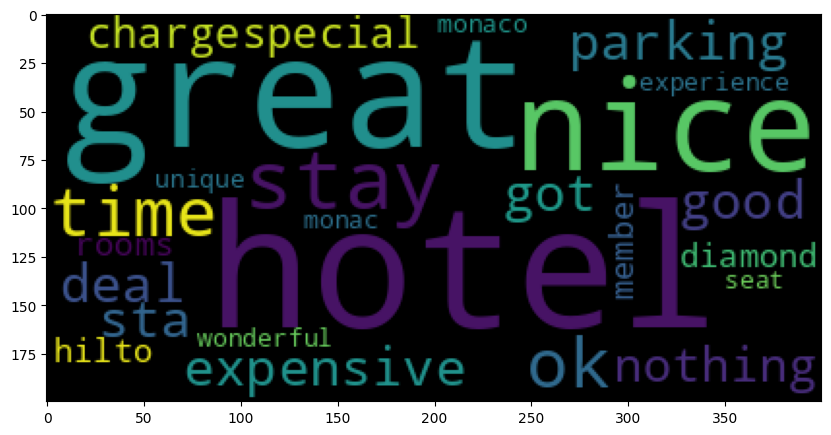

In [36]:
cloud= WordCloud(stopwords=stopwords.words("english"),max_words=25).generate(str(td.X))
plt.figure(figsize=(10,10))
plt.imshow(cloud)
# more the freq more is the font size

In [37]:
df1=td[td.Y==0]
df2=td[td.Y==1]

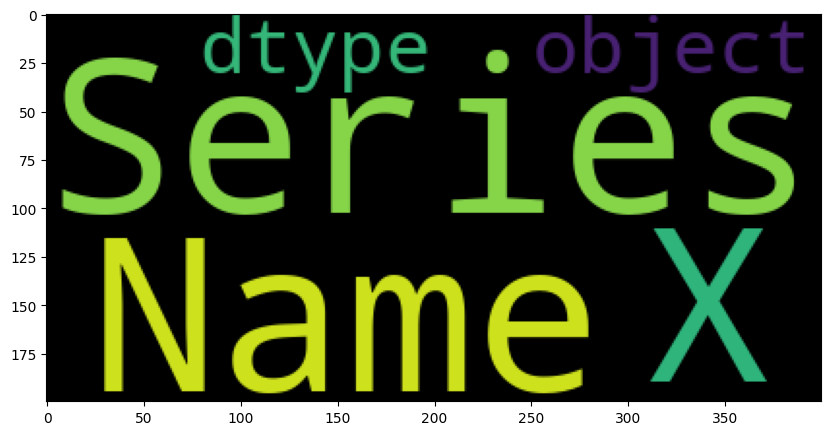

In [38]:
cloud= WordCloud(stopwords=stopwords.words("english"),max_words=25).generate(str(df1.X))
plt.figure(figsize=(10,10))
plt.imshow(cloud)
# more the freq more is the font size

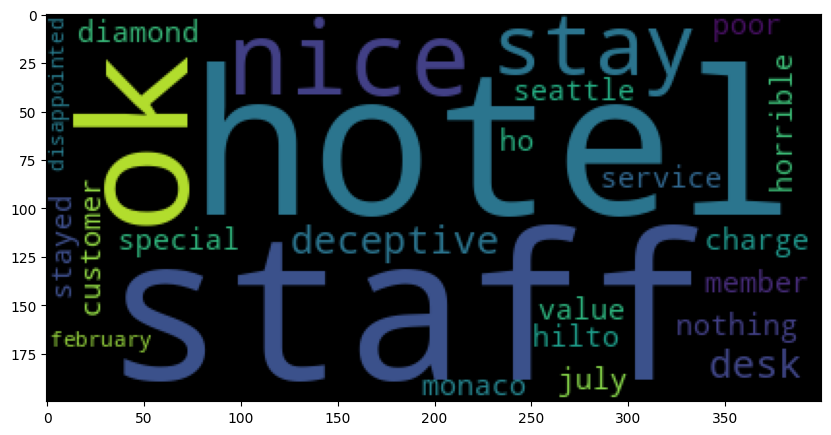

In [39]:
cloud= WordCloud(stopwords=stopwords.words("english"),max_words=25).generate(str(df2.X))
plt.figure(figsize=(10,10))
plt.imshow(cloud)
# more the freq more is the font size